## 1. Business Understanding¶
This case study is intended to assist technology companies in developing and improving components for autonomous vehicles.
In doing so, this case study poses the question:
In which areas are the weaknesses of the tested systems and how can these be classified?
The question will be answered by classifying the reasons for the human test driver's intervention in the system. In doing so, the reasons are to be classified into different categories:
- Software problems
- hardware problems
- Software and hardware problems (problems that occur in combination)
- Problems caused by objects of traffic control (e.g. malfunctions of traffic light systems)
- problems caused by other road users
- external influences (including e.g. blockages, hidden elements, weather and road conditions)
- other problems

## 2. Data and Data Understanding 
The underlying dataset was obtained from Kaggle and shows necessary interventions by a driver in autonomous driving vehicle technology.
It was recorded from December 1, 2018 to November 30, 2019 and is licensed under U.S. Government Works.
The data processing is done with the help of a Jupyter notebook, which is included in the most popular data science platform "Anaconda".
The data set is in 8885 x 9 format.
The following data was recorded:
- Manufacturer
- Approval number
- date
- Vehicle identification number
- Possibility of operation without driver
- Is there a driver on site?
- Autonomous driving interrupted by AV system, test driver, remote control, or passenger
- Location of incident: interstate, highway, expressway, rural road, street or parking lot
- Description of causes

## 2.1. Import of Relevant Modules

In [76]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
pd.__version__

'2.0.3'

## 2.2 Read Data

In [78]:
raw_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Improvement_of_components_for_autonomous_motor_vehicles_data.csv')

In [79]:
raw_data.to_csv('rawdata.csv', index=False)
raw_data.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...


## 2.3. Data Cleaning

In [80]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8885 entries, 0 to 8884
Data columns (total 9 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Manufacturer                                                                                    8885 non-null   object
 1   Permit Number                                                                                   8885 non-null   object
 2   DATE                                                                                            8884 non-null   object
 3   VIN NUMBER                                                                                      8884 non-null   object
 4   VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER
(Yes or No)                                    8884 non-null   object
 5   DRIVER PRESENT
(Yes o

In [81]:
raw_data.describe(include="all")

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
count,8885,8885,8884,8884,8884,8884,8884,8884,8884
unique,28,27,3711,289,5,4,4,11,469
top,Toyota Research Institute,AVT050,3/28/2019,JTHDU1EF3G5020098,No,Yes,Test Driver,Street,Safety Driver proactive disengagement.
freq,2947,2947,59,900,4369,4934,6037,4668,1780


In [82]:
raw_data.rename(columns = {'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)':'OPERATING WITHOUT DRIVER', 'DRIVER PRESENT\n(Yes or No)':'DRIVER PRESENT', 'DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)':'DISENGAGEMENT INITIATED BY', 'DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)':'DISENGAGEMENT LOCATION', 'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT':'FACTS CAUSING DISENGAGEMENT'}, inplace = True) 

## Missing Values

In [83]:
raw_data.isnull().sum()

Manufacturer                   0
Permit Number                  0
DATE                           1
VIN NUMBER                     1
OPERATING WITHOUT DRIVER       1
DRIVER PRESENT                 1
DISENGAGEMENT INITIATED BY     1
DISENGAGEMENT LOCATION         1
FACTS CAUSING DISENGAGEMENT    1
dtype: int64

In [84]:
data_no_mv=raw_data.dropna(axis=0)
data_no_mv.isnull().sum()

Manufacturer                   0
Permit Number                  0
DATE                           0
VIN NUMBER                     0
OPERATING WITHOUT DRIVER       0
DRIVER PRESENT                 0
DISENGAGEMENT INITIATED BY     0
DISENGAGEMENT LOCATION         0
FACTS CAUSING DISENGAGEMENT    0
dtype: int64

In [85]:
data_no_mv.describe(include='all')

,Manufacturer,Permit Number,DATE,VIN NUMBER,OPERATING WITHOUT DRIVER,DRIVER PRESENT,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,FACTS CAUSING DISENGAGEMENT
count,8884,8884,8884,8884,8884,8884,8884,8884,8884
unique,27,26,3711,289,5,4,4,11,469
top,Toyota Research Institute,AVT050,3/28/2019,JTHDU1EF3G5020098,No,Yes,Test Driver,Street,Safety Driver proactive disengagement.
freq,2947,2947,59,900,4369,4934,6037,4668,1780


## Data preparation and labeling

In [86]:
data_no_mv['DISENGAGEMENT INITIATED BY'].value_counts()

DISENGAGEMENT INITIATED BY
Test Driver         6037
AV System           2698
Vehicle Operator      81
Test driver           68
Name: count, dtype: int64

In [87]:
data_no_mv['FACTS CAUSING DISENGAGEMENT'].nunique()

469

In [88]:
data_no_mv.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,OPERATING WITHOUT DRIVER,DRIVER PRESENT,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,FACTS CAUSING DISENGAGEMENT
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...


In [89]:
data_no_mv['FACTS CAUSING DISENGAGEMENT'].value_counts()

FACTS CAUSING DISENGAGEMENT
Safety Driver proactive disengagement.                                                                                                                                  1780
Disengage for unwanted maneuver of the vehicle caused by a planning discrepancy while generating an appropriate trajectory                                               805
Automatic disengagement caused by planner fault.                                                                                                                         742
Disengage due to operator discomfort                                                                                                                                     636
Disengage for a software fault due to a potential performance issue with a software component of the self-driving system (including third party software components)     482
                                                                                                           

In [90]:
data_no_mv['DISENGAGEMENT INITIATED BY'].value_counts()

DISENGAGEMENT INITIATED BY
Test Driver         6037
AV System           2698
Vehicle Operator      81
Test driver           68
Name: count, dtype: int64

In [91]:
data_reduced = data_no_mv.loc[0:1999, :]

In [92]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Manufacturer                 2000 non-null   object
 1   Permit Number                2000 non-null   object
 2   DATE                         2000 non-null   object
 3   VIN NUMBER                   2000 non-null   object
 4   OPERATING WITHOUT DRIVER     2000 non-null   object
 5   DRIVER PRESENT               2000 non-null   object
 6   DISENGAGEMENT INITIATED BY   2000 non-null   object
 7   DISENGAGEMENT LOCATION       2000 non-null   object
 8   FACTS CAUSING DISENGAGEMENT  2000 non-null   object
dtypes: object(9)
memory usage: 156.2+ KB


In [93]:
data_reduced['FACTS CAUSING DISENGAGEMENT'].nunique()

92

In [94]:
data_reduced.drop_duplicates(subset ="FACTS CAUSING DISENGAGEMENT", 
                     keep = 'first', inplace = True) 

C:\Users\ar\AppData\Local\Temp\ipykernel_3376\3061903378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced.drop_duplicates(subset ="FACTS CAUSING DISENGAGEMENT",


In [95]:
data_reduced = data_reduced.reset_index()

In [96]:
data_reduced['FACTS CAUSING DISENGAGEMENT'] = data_reduced['FACTS CAUSING DISENGAGEMENT'].astype('str')

In [97]:
data_reduced['FACTS CAUSING DISENGAGEMENT'].dtype

dtype('O')

In [98]:
import re

In [99]:
software_keywords = ["software performance", "software fault", "software discrepancy"
                     "trajectory planning", "planning discrepancy", "planning error",
                     "wrong lane change suggestion", "wrong lane association", "data recording",
                     "improper lane-change plan", "undesirable manuever", "undesirable yielding maneuver",
                     "outside of rate requirements", "merged poorly", "mapping issue", "software issue",
                    "poor trajectory across lanes", "incorrect assessment", "incorrect behavior",
                    "unprotected", "Poor lane change", "very wide", "wrong object prediction", "undesired motion",
                    "unwanted maneuver", "perception discrepancy", "ghost object prediction",
                    "driving faster than driver expected", "expected path",
                    "not initialized correctly", "software module", "perception mismatch", "estimation",
                    "planner fault", "unstable"]

In [100]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(software_keywords), na=False, case=False)
                  , 'Problem class'] = "Software" 

C:\Users\ar\AppData\Local\Temp\ipykernel_3376\1320408372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(software_keywords), na=False, case=False)


In [101]:
hardware_keywords = ["hardware performance", "hardware diagnostics", "controls diagnostics", "actor", 
                    "yield to other actors", "Hardware irregularity", "weather conditions", "Autobox", 
                    "performance issue with a hardware component"]

In [102]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(hardware_keywords), na=False, case=False)
                  , 'Problem class'] = "Hardware" 

In [103]:
soft_hardware_keywords = ["timed out", "timeout", "too long", "incorrect detection", "Lost track", "Localization", 
                         "geo-location related", "unsuccessful right turn", "unsuccessful left turn", "system",
                         "traffic conditions", "failed to detect an object correctly", " took longer than expected",
                         "main computer froze", "not braking correctly", "not speeding up correctly",
                         "not turning enough", "not slowing down enough", "didn't detect", "Sensor Fusion discrepancy",
                         "did not meet expectation"]

In [104]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(soft_hardware_keywords), na=False, case=False)
                  , 'Problem class'] = "Software/Hardware" 

In [105]:
Traffic_ctrl_keywords = ["unstable target lane", "Traffic light error", "Stop sign error"]

In [106]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(Traffic_ctrl_keywords), na=False, case=False)
                  , 'Problem class'] = "Traffic control objects" 

In [107]:
road_user_keywords = ["reckless driver", "behaving road user", "other road user"]

In [108]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(road_user_keywords), na=False, case=False)
                  , 'Problem class'] = "Other road user" 

In [109]:
external_influences = ["obstruction", "encroachment", "occluded view", "surface conditions", "wheater"]

In [110]:
data_no_mv.loc[data_no_mv['FACTS CAUSING DISENGAGEMENT'].str.contains('|'.join(external_influences), na=False, case=False)
                  , 'Problem class'] = "External influences" 

In [111]:
data_no_mv.loc[data_no_mv['Problem class'].isnull()
                  , 'Problem class'] = "Other problems" 

In [112]:
data_no_mv.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,OPERATING WITHOUT DRIVER,DRIVER PRESENT,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,FACTS CAUSING DISENGAGEMENT,Problem class
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",Traffic control objects
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",Traffic control objects
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",Traffic control objects
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",Other problems
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,Software


## Classification model

In [113]:
data_preprocessed = data_no_mv.copy()
data_preprocessed['Problem class']=data_preprocessed['Problem class'].map(
    {'Software':0,'Hardware':1,'Software/Hardware':2,
    'Traffic control objects':3,'Other road user':4, 'External influences':5,
     'Other problems':6})


In [114]:
data_preprocessed.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,OPERATING WITHOUT DRIVER,DRIVER PRESENT,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,FACTS CAUSING DISENGAGEMENT,Problem class
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",3
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",3
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",3
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",6
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,0


In [115]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8884 entries, 0 to 8884
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Manufacturer                 8884 non-null   object
 1   Permit Number                8884 non-null   object
 2   DATE                         8884 non-null   object
 3   VIN NUMBER                   8884 non-null   object
 4   OPERATING WITHOUT DRIVER     8884 non-null   object
 5   DRIVER PRESENT               8884 non-null   object
 6   DISENGAGEMENT INITIATED BY   8884 non-null   object
 7   DISENGAGEMENT LOCATION       8884 non-null   object
 8   FACTS CAUSING DISENGAGEMENT  8884 non-null   object
 9   Problem class                8884 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 1021.5+ KB


In [116]:
data_with_dummies = pd.get_dummies(data_preprocessed, drop_first=True)
data_with_dummies.head()

,Problem class,Manufacturer_Apple Inc.,"Manufacturer_Aurora Innovation, Inc.","Manufacturer_AutoX Technologies, Inc.",Manufacturer_BMW of North America,Manufacturer_Baidu USA LLC,Manufacturer_CRUISE LLC,Manufacturer_Drive.ai Inc,Manufacturer_Lyft,"Manufacturer_Mercedes-Benz Research & Development North America, Inc.",...,"FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, \nprecautionary takeover to address perception, \nother road user behaving poorly","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, \nprecautionary takeover to address perception, AV made unsuccessful left turn","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, \nprecautionary takeover to address perception, third party lane encroachment","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, \nprecautionary takeover to address perception, third party lane obstruction","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, AV lane change issues","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, AV made unsuccessful left turn","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, other road user behaving poorly","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, third party lane encroachment","FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, third party lane obstruction","FACTS CAUSING DISENGAGEMENT_prediction discrepancy, a vehicle in the front was backing up, ego was not able to predict this behavior correctly."
0,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
data_with_dummies.isnull().sum()

Problem class                                                                                                                                      0
Manufacturer_Apple Inc.                                                                                                                            0
Manufacturer_Aurora Innovation, Inc.                                                                                                               0
Manufacturer_AutoX Technologies, Inc.                                                                                                              0
Manufacturer_BMW of North America                                                                                                                  0
                                                                                                                                                  ..
FACTS CAUSING DISENGAGEMENT_precautionary takeover to address planning, AV made unsuccessful left turn    

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [119]:
target = data_with_dummies['Problem class']
inputs = data_with_dummies.drop(['Problem class'],axis=1)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

C:\Users\ar\AppData\Local\Temp\ipykernel_3376\2234393116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test),bins=50)


<Axes: xlabel='Problem class', ylabel='Density'>

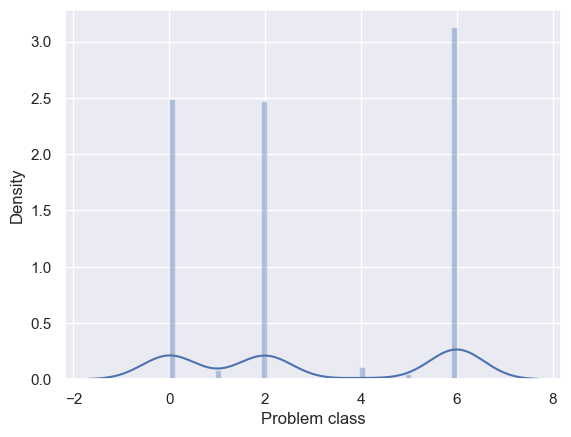

In [121]:
sns.distplot((y_test),bins=50)

## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dtree = DecisionTreeClassifier()

In [126]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [127]:
predictions = dtree.predict(x_test)

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       531
           1       1.00      0.94      0.97        17
           2       0.99      0.98      0.98       527
           3       0.00      0.00      0.00         1
           4       0.79      0.96      0.87        24
           5       1.00      0.80      0.89        10
           6       0.99      0.99      0.99       667

    accuracy                           0.99      1777
   macro avg       0.82      0.81      0.81      1777
weighted avg       0.99      0.99      0.99      1777

